In [259]:
import numpy as np
import pandas as pd
# modeling utilities
import scipy.stats as stats
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from  sklearn import model_selection
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn import preprocessing
import math
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
from pandas.plotting import scatter_matrix
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

%matplotlib inline
%cd /Users/cyliai/RMBI3110_Assignment2

/Users/cyliai/RMBI3110_Assignment2


# Data Exploration

In [148]:
cs_df = pd.read_csv('Happiness.csv')

In [149]:
cs_df

Country                           Region  Happiness Rank  \
0                 Denmark                   Western Europe               1   
1             Switzerland                   Western Europe               2   
2                 Iceland                   Western Europe               3   
3                  Norway                   Western Europe               4   
4                 Finland                   Western Europe               5   
5                  Canada                    North America               6   
6             Netherlands                   Western Europe               7   
7             New Zealand        Australia and New Zealand               8   
8               Australia        Australia and New Zealand               9   
9                  Sweden                   Western Europe              10   
10                 Israel  Middle East and Northern Africa              11   
11                Austria                   Western Europe              12   
12          United States                    North America              13   
13             Costa Rica      Latin America and Caribbean              14   
14            Puerto Rico      Latin America and Caribbean              15   
15                Germany                   Western Europe              16   
16                 Brazil      Latin America and Caribbean              17   
17                Belgium                   Western Europe              18   
18                Ireland                   Western Europe              19   
19             Luxembourg                   Western Europe              20   
20                 Mexico      Latin America and Caribbean              21   
21              Singapore                Southeastern Asia              22   
22         United Kingdom                   Western Europe              23   
23                  Chile      Latin America and Caribbean              24   
24                 Panama      Latin America and Caribbean              25   
25              Argentina      Latin America and Caribbean              26   
26         Czech Republic       Central and Eastern Europe              27   
27   United Arab Emirates  Middle East and Northern Africa              28   
28                Uruguay      Latin America and Caribbean              29   
29                  Malta                   Western Europe              30   
..                    ...                              ...             ...   
127               Senegal               Sub-Saharan Africa             128   
128              Bulgaria       Central and Eastern Europe             129   
129            Mauritania               Sub-Saharan Africa             130   
130              Zimbabwe               Sub-Saharan Africa             131   
131                Malawi               Sub-Saharan Africa             132   
132                 Sudan               Sub-Saharan Africa             133   
133                 Gabon               Sub-Saharan Africa             134   
134                  Mali               Sub-Saharan Africa             135   
135                 Haiti      Latin America and Caribbean             136   
136              Botswana               Sub-Saharan Africa             137   
137               Comoros               Sub-Saharan Africa             138   
138           Ivory Coast               Sub-Saharan Africa             139   
139              Cambodia                Southeastern Asia             140   
140                Angola               Sub-Saharan Africa             141   
141                 Niger               Sub-Saharan Africa             142   
142           South Sudan               Sub-Saharan Africa             143   
143                  Chad               Sub-Saharan Africa             144   
144          Burkina Faso               Sub-Saharan Africa             145   
145                Uganda               Sub-Saharan Africa             145   
146                 Yemen  Middle East a

In [150]:
cs_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

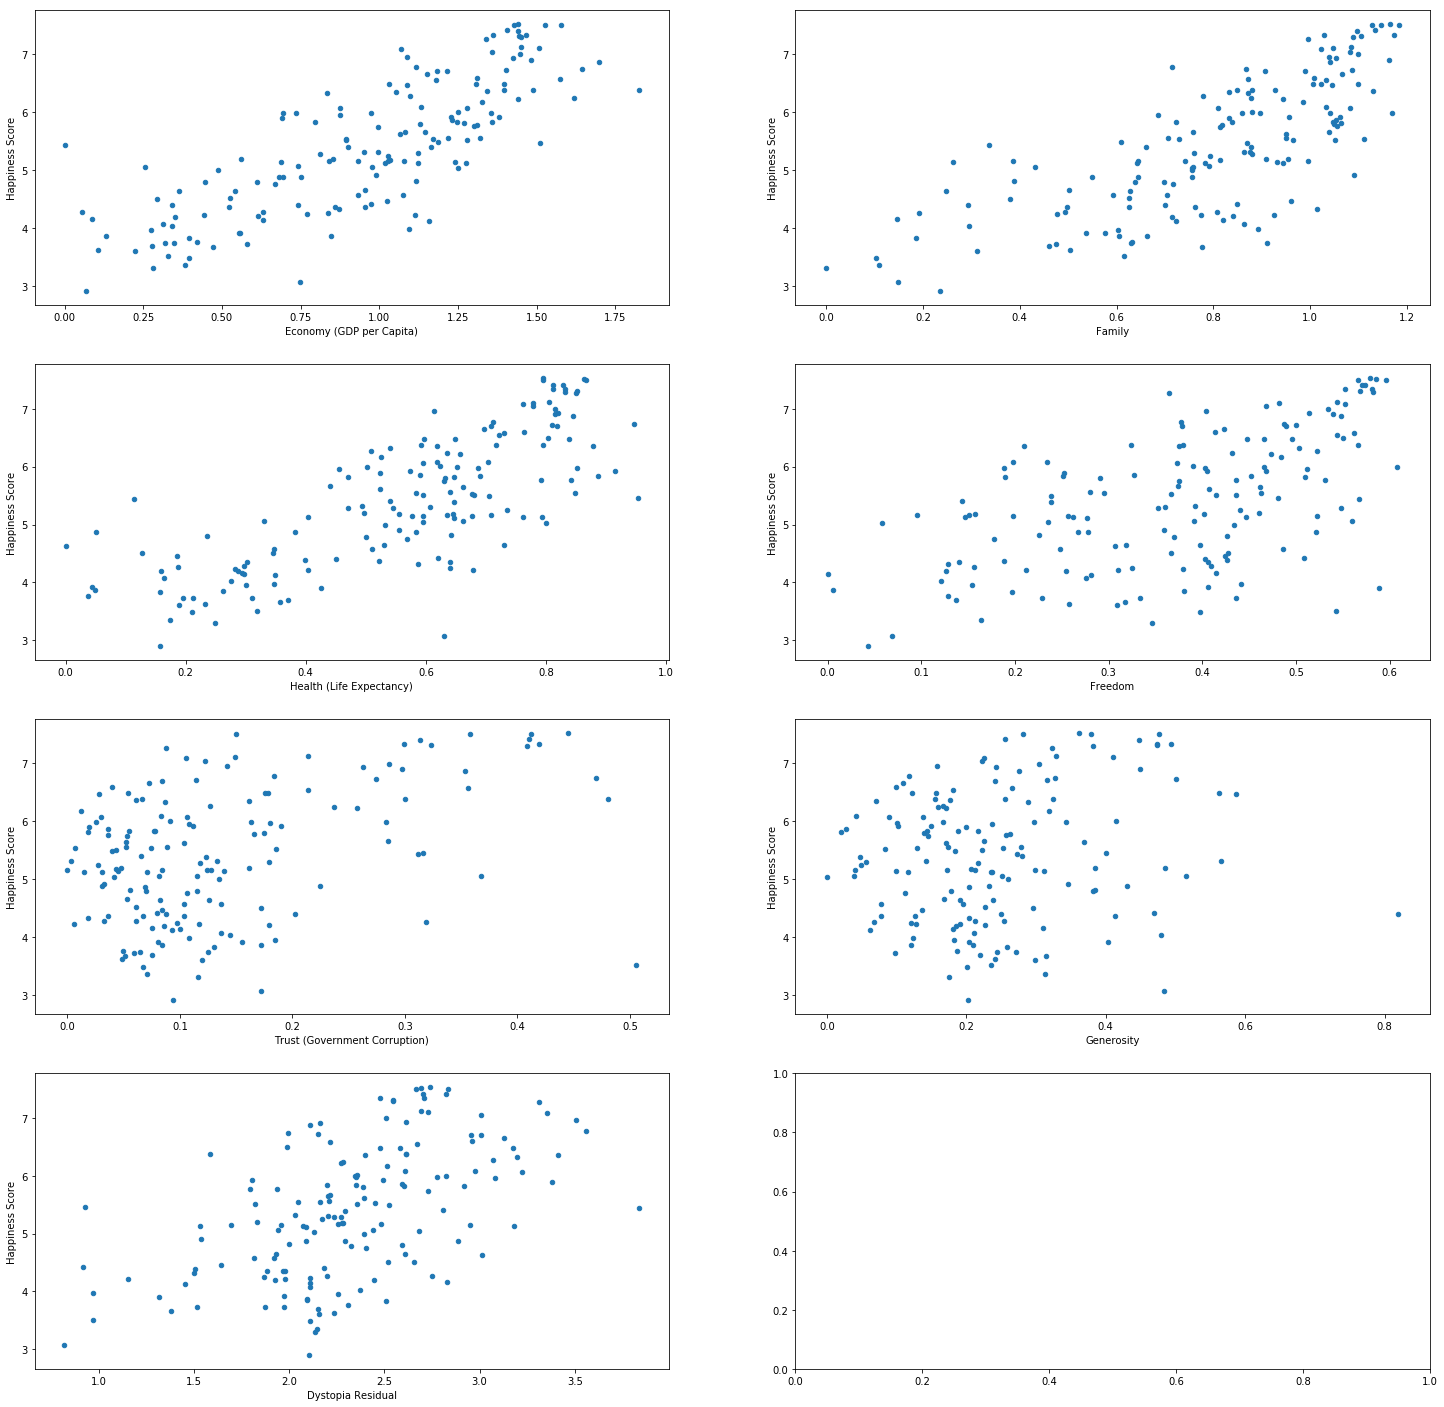

In [151]:
## To see how different attributes related to Happiness Socre
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7,ax8)) = plt.subplots(nrows=4, ncols=2,figsize=(25,25))

cs_df.plot(kind='scatter',x='Economy (GDP per Capita)',y='Happiness Score',ax=ax1)
cs_df.plot(kind='scatter',x='Family',y='Happiness Score',ax=ax2)
cs_df.plot(kind='scatter',x='Health (Life Expectancy)',y='Happiness Score',ax=ax3)
cs_df.plot(kind='scatter',x='Freedom',y='Happiness Score',ax=ax4)
cs_df.plot(kind='scatter',x='Trust (Government Corruption)',y='Happiness Score',ax=ax5)
cs_df.plot(kind='scatter',x='Generosity',y='Happiness Score',ax=ax6)
cs_df.plot(kind='scatter',x='Dystopia Residual',y='Happiness Score',ax=ax7)

In [152]:
#top 10 happy countries
happydf = pd.DataFrame(columns = ['Country','Region','Happiness Rank'])
happy10 = cs_df.Country.head(10)
happyregion = cs_df.Region.head(10)
rank10 = cs_df['Happiness Rank'].head(10)
happydf['Country'] = happy10
happydf['Happiness Rank'] = rank10
happydf['Region'] = happyregion
happydf

Country                     Region  Happiness Rank
0      Denmark             Western Europe               1
1  Switzerland             Western Europe               2
2      Iceland             Western Europe               3
3       Norway             Western Europe               4
4      Finland             Western Europe               5
5       Canada              North America               6
6  Netherlands             Western Europe               7
7  New Zealand  Australia and New Zealand               8
8    Australia  Australia and New Zealand               9
9       Sweden             Western Europe              10

In [153]:
cs_df.Country.unique().shape

(157,)

In [154]:
#The countries that have lowest GDP per capita
lowgdp = cs_df.sort_values(by = ['Economy (GDP per Capita)']).reset_index()
poorcountry = lowgdp['Country'].head(10)
poorgdp = lowgdp['Economy (GDP per Capita)'].head(10)
poorhappy = lowgdp['Happiness Rank'].head(10)
less10gdp = pd.DataFrame(columns = ['Country','Economy (GDP per Capita)','Happiness Rank'])
less10gdp['Country'] = poorcountry
less10gdp['Economy (GDP per Capita)'] = poorgdp
less10gdp['Happiness Rank'] = poorhappy
less10gdp.head(10)

Country  Economy (GDP per Capita)  Happiness Rank
0            Somalia                   0.00000              76
1   Congo (Kinshasa)                   0.05661             125
2            Burundi                   0.06831             157
3             Malawi                   0.08709             132
4            Liberia                   0.10706             150
5              Niger                   0.13270             142
6             Guinea                   0.22415             151
7  Somaliland Region                   0.25558              97
8            Comoros                   0.27509             138
9         Madagascar                   0.27954             148

In [155]:
#The countries that have highest GDP per capita
hgdp = cs_df.sort_values(by ='Economy (GDP per Capita)', ascending = False).reset_index()
richcountry = hgdp['Country'].head(10)
richgdp = hgdp['Economy (GDP per Capita)'].head(10)
richhappy = hgdp['Happiness Rank'].head(10)
top10gdp = pd.DataFrame(columns = ['Country','Economy (GDP per Capita)','Happiness Rank'])
top10gdp['Country'] = richcountry
top10gdp['Economy (GDP per Capita)'] = richgdp
top10gdp['Happiness Rank'] = richhappy
top10gdp.head(10)

Country  Economy (GDP per Capita)  Happiness Rank
0                 Qatar                   1.82427              36
1            Luxembourg                   1.69752              20
2             Singapore                   1.64555              22
3                Kuwait                   1.61714              41
4                Norway                   1.57744               4
5  United Arab Emirates                   1.57352              28
6           Switzerland                   1.52733               2
7             Hong Kong                   1.51070              75
8         United States                   1.50796              13
9          Saudi Arabia                   1.48953              34

In [156]:
from scipy.stats import rankdata
rankedgdp = rankdata([-1 * i for i in cs_df['Economy (GDP per Capita)']], method = 'ordinal')
rankedfam = rankdata([-1 * i for i in cs_df['Family']], method = 'ordinal')
rankedhealth = rankdata([-1 * i for i in cs_df['Health (Life Expectancy)']], method = 'ordinal')
rankedfreedom = rankdata([-1 * i for i in cs_df['Freedom']], method = 'ordinal')
rankedtrust = rankdata([-1 * i for i in cs_df['Trust (Government Corruption)']], method = 'ordinal')
rankedgen = rankdata([-1 * i for i in cs_df['Generosity']], method = 'ordinal')
rankeddr = rankdata([-1 * i for i in cs_df['Dystopia Residual']], method = 'ordinal')

rankeddf = pd.DataFrame(columns = ['Country','Happiness Rank','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom',
                                  'Trust (Government Corruption)','Generosity','Dystopia Residual'])
rankeddf['Country'] = cs_df['Country']
rankeddf['Happiness Rank'] = cs_df['Happiness Rank']
rankeddf['Economy (GDP per Capita)'] = rankedgdp
rankeddf['Family'] = rankedfam
rankeddf['Health (Life Expectancy)'] = rankedhealth
rankeddf['Freedom'] = rankedfreedom
rankeddf['Trust (Government Corruption)'] = rankedtrust
rankeddf['Generosity'] = rankedgen
rankeddf['Dystopia Residual'] = rankeddr
rankeddf.head(10)

Country  Happiness Rank  Economy (GDP per Capita)  Family  \
0      Denmark               1                        17       4   
1  Switzerland               2                         7       6   
2      Iceland               3                        20       1   
3       Norway               4                         5       9   
4      Finland               5                        22       7   
5       Canada               6                        19      14   
6  Netherlands               7                        12      38   
7  New Zealand               8                        27       2   
8    Australia               9                        16      11   
9       Sweden              10                        13      16   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                        30        7                              4   
1                         7        4                              6   
2                         6       13                             50   
3                        28        2                             10   
4                        23        9                              7   
5                        17        8                             16   
6                        22       17                             19   
7                        16        6                              5   
8                         8       10                             13   
9                        15        5                              8   

   Generosity  Dystopia Residual  
0          29                 31  
1          48                 36  
2          11                 24  
3          27                 40  
4          60                 26  
5          16                 35  
6          12                 34  
7           7                 60  
8          13                 52  
9          25                 51

# Data checking and processing

In [157]:
#data checking
print(cs_df['Economy (GDP per Capita)'].describe())
print('\n')
print(cs_df['Family'].describe())
print('\n')
print(cs_df['Health (Life Expectancy)'].describe())
print('\n')
print(cs_df['Freedom'].describe())
print('\n')
print(cs_df['Trust (Government Corruption)'].describe())
print('\n')
print(cs_df['Generosity'].describe())
print('\n')
print(cs_df['Dystopia Residual'].describe())

count    157.000000
mean       0.953880
std        0.412595
min        0.000000
25%        0.670240
50%        1.027800
75%        1.279640
max        1.824270
Name: Economy (GDP per Capita), dtype: float64


count    157.000000
mean       0.793621
std        0.266706
min        0.000000
25%        0.641840
50%        0.841420
75%        1.021520
max        1.183260
Name: Family, dtype: float64


count    157.000000
mean       0.557619
std        0.229349
min        0.000000
25%        0.382910
50%        0.596590
75%        0.729930
max        0.952770
Name: Health (Life Expectancy), dtype: float64


count    157.000000
mean       0.370994
std        0.145507
min        0.000000
25%        0.257480
50%        0.397470
75%        0.484530
max        0.608480
Name: Freedom, dtype: float64


count    157.000000
mean       0.137624
std        0.111038
min        0.000000
25%        0.061260
50%        0.105470
75%        0.175540
max        0.505210
Name: Trust (Government Corruption), dt

In [158]:
#Data preparation for clustering
cluster_df = cs_df.groupby("Country").min().reset_index()[['Country', 'Economy (GDP per Capita)']]
ha_region = cs_df[['Country', 'Region']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_region, how='outer')
ha_fam = cs_df[['Country', 'Family']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_fam, how='outer')
ha_health = cs_df[['Country', 'Health (Life Expectancy)']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_health, how='outer')
ha_freedom = cs_df[['Country', 'Freedom']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_freedom, how='outer')
ha_trust = cs_df[['Country', 'Trust (Government Corruption)']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_trust, how='outer')
ha_Generosity = cs_df[['Country', 'Generosity']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_Generosity, how='outer')
ha_DR = cs_df[['Country', 'Dystopia Residual']].groupby("Country").sum().reset_index()
cluster_df = cluster_df.merge(ha_DR, how='outer')
analytics_df = cluster_df
cluster_df.head(10)

Country  Economy (GDP per Capita)                           Region  \
0  Afghanistan                   0.38227                    Southern Asia   
1      Albania                   0.95530       Central and Eastern Europe   
2      Algeria                   1.05266  Middle East and Northern Africa   
3       Angola                   0.84731               Sub-Saharan Africa   
4    Argentina                   1.15137      Latin America and Caribbean   
5      Armenia                   0.86086       Central and Eastern Europe   
6    Australia                   1.44443        Australia and New Zealand   
7      Austria                   1.45038                   Western Europe   
8   Azerbaijan                   1.12373       Central and Eastern Europe   
9      Bahrain                   1.44024  Middle East and Northern Africa   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  0.11037                   0.17344  0.16430                        0.07112   
1  0.50163                   0.73007  0.31866                        0.05301   
2  0.83309                   0.61804  0.21006                        0.16157   
3  0.66366                   0.04991  0.00589                        0.08434   
4  1.06612                   0.69711  0.42284                        0.07296   
5  0.62477                   0.64083  0.14037                        0.03616   
6  1.10476                   0.85120  0.56837                        0.32331   
7  1.08383                   0.80565  0.54355                        0.21348   
8  0.76042                   0.54504  0.35327                        0.17914   
9  0.94397                   0.65696  0.47375                        0.25772   

   Generosity  Dystopia Residual  
0     0.31268            2.14558  
1     0.16840            1.92816  
2     0.07044            3.40904  
3     0.12071            2.09459  
4     0.10989            3.12985  
5     0.07793            1.97864  
6     0.47407            2.54650  
7     0.32865            2.69343  
8     0.05640            2.27350  
9     0.17147            2.27405

In [159]:
#prepare for data analysis
ha_hs = cs_df[['Country', 'Happiness Score']].groupby("Country").sum().reset_index()
analytics_df = analytics_df.merge(ha_hs, how='outer')
analytics_df

Country  Economy (GDP per Capita)  \
0               Afghanistan                   0.38227   
1                   Albania                   0.95530   
2                   Algeria                   1.05266   
3                    Angola                   0.84731   
4                 Argentina                   1.15137   
5                   Armenia                   0.86086   
6                 Australia                   1.44443   
7                   Austria                   1.45038   
8                Azerbaijan                   1.12373   
9                   Bahrain                   1.44024   
10               Bangladesh                   0.54177   
11                  Belarus                   1.13062   
12                  Belgium                   1.42539   
13                   Belize                   0.87616   
14                    Benin                   0.39499   
15                   Bhutan                   0.85270   
16                  Bolivia                   0.79422   
17   Bosnia and Herzegovina                   0.93383   
18                 Botswana                   1.09426   
19                   Brazil                   1.08754   
20                 Bulgaria                   1.11306   
21             Burkina Faso                   0.31995   
22                  Burundi                   0.06831   
23                 Cambodia                   0.55604   
24                 Cameroon                   0.52497   
25                   Canada                   1.44015   
26                     Chad                   0.42214   
27                    Chile                   1.21670   
28                    China                   1.02780   
29                 Colombia                   1.03032   
..                      ...                       ...   
127             South Korea                   1.35948   
128             South Sudan                   0.39394   
129                   Spain                   1.34253   
130               Sri Lanka                   0.97318   
131                   Sudan                   0.63069   
132                Suriname                   1.09686   
133                  Sweden                   1.45181   
134             Switzerland                   1.52733   
135                   Syria                   0.74719   
136                  Taiwan                   1.39729   
137              Tajikistan                   0.48835   
138                Tanzania                   0.47155   
139                Thailand                   1.08930   
140                    Togo                   0.28123   
141     Trinidad and Tobago                   1.32572   
142                 Tunisia                   0.97724   
143                  Turkey                   1.16492   
144            Turkmenistan                   1.08017   
145                  Uganda                   0.34719   
146                 Ukraine                   0.87287   
147    United Arab Emirates                   1.57352   
148          United Kingdom                   1.40283   
149           United States                   1.50796   
150                 Uruguay                   1.18157   
151              Uzbekistan                   0.73591   
152               Venezuela                   1.13367   
153                 Vietnam                   0.74037   
154                   Yemen                   0.57939   
155                  Zambia                   0.61202   
156                Zimbabwe                   0.35041   

                              Region   Family  Health (Life Expectancy)  \
0                      Southern Asia  0.11037                   0.17344   
1         Central and Eastern Europe  0.50163                   0.73007   
2    Middle East and Northern Africa  0.83309                   0.61804   
3                 Sub-Saharan Africa  0.66366                   0.04991   
4        Latin America and Caribbean  1.06612                   0.69711   
5         Central and Eastern Europ

# Normality check

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



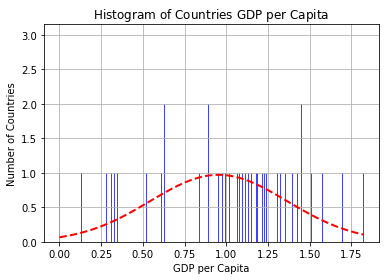

In [160]:
x = cluster_df['Economy (GDP per Capita)']
mu = np.mean(cluster_df['Economy (GDP per Capita)'])
#.mean(): Compute the arithmetic mean along the specified axis.
sigma = math.sqrt(np.var(cluster_df['Economy (GDP per Capita)']))
#.var(): Compute the variance along the specified axis.
n, bins, patches = plt.hist(x, 1000, facecolor='blue', alpha=0.75)
#.hist(): Plot a histogram.
#facecolor: clor of the bars
#alpha: float (0.0 transparent through 1.0 opaque)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('GDP per Capita')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ GDP\ per\ Capita}\ $')
plt.grid(True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



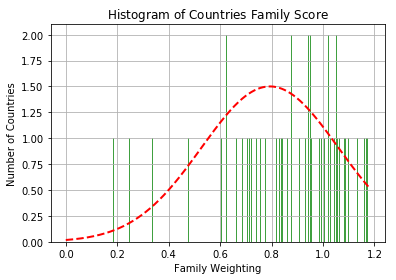

In [161]:
x = cluster_df['Family']
mu = np.mean(cluster_df['Family'])
sigma = math.sqrt(np.var(cluster_df['Family']))
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Family Weighting')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ Family\ Score}\ $')
plt.grid(True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



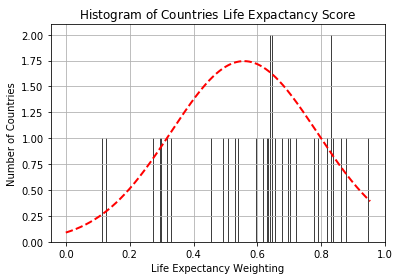

In [162]:
x = cluster_df['Health (Life Expectancy)']
mu = np.mean(cluster_df['Health (Life Expectancy)'])
sigma = math.sqrt(np.var(cluster_df['Health (Life Expectancy)']))
n, bins, patches = plt.hist(x, 1000, facecolor='black', alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Life Expectancy Weighting')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ Life\ Expactancy\ Score}\ $')
plt.grid(True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



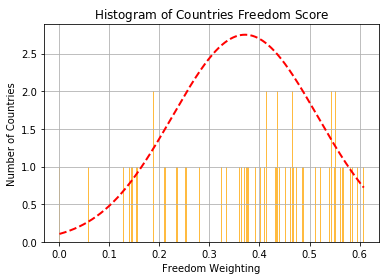

In [163]:
x = cluster_df['Freedom']
mu = np.mean(cluster_df['Freedom'])
sigma = math.sqrt(np.var(cluster_df['Freedom']))
n, bins, patches = plt.hist(x, 1000, facecolor='orange', alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Freedom Weighting')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ Freedom\ Score}\ $')
plt.grid(True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



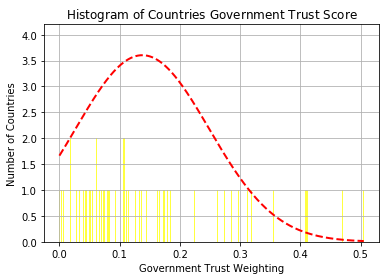

In [164]:
x = cluster_df['Trust (Government Corruption)']
mu = np.mean(cluster_df['Trust (Government Corruption)'])
sigma = math.sqrt(np.var(cluster_df['Trust (Government Corruption)']))
n, bins, patches = plt.hist(x, 1000, facecolor='yellow', alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Government Trust Weighting')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ Government\ Trust\ Score}\ $')
plt.grid(True)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



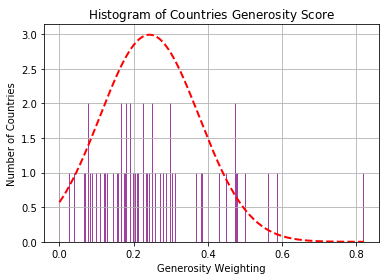

In [165]:
x = cluster_df['Generosity']
mu = np.mean(cluster_df['Generosity'])
sigma = math.sqrt(np.var(cluster_df['Generosity']))
n, bins, patches = plt.hist(x, 1000, facecolor='purple', alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Generosity Weighting')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ Generosity\ Score}\ $')
plt.grid(True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf



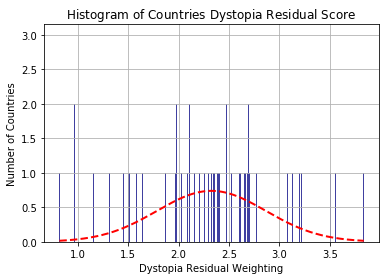

In [166]:
x = cluster_df['Dystopia Residual']
mu = np.mean(cluster_df['Dystopia Residual'])
sigma = math.sqrt(np.var(cluster_df['Dystopia Residual']))
n, bins, patches = plt.hist(x, 1000, facecolor='navy', alpha=0.75)
y = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Dystopia Residual Weighting')
plt.ylabel('Number of Countries')
plt.title(r'$\mathrm{Histogram\ of\ Countries\ Dystopia\ Residual\ Score}\ $')
plt.grid(True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c231d6828>,
      dtype=object)

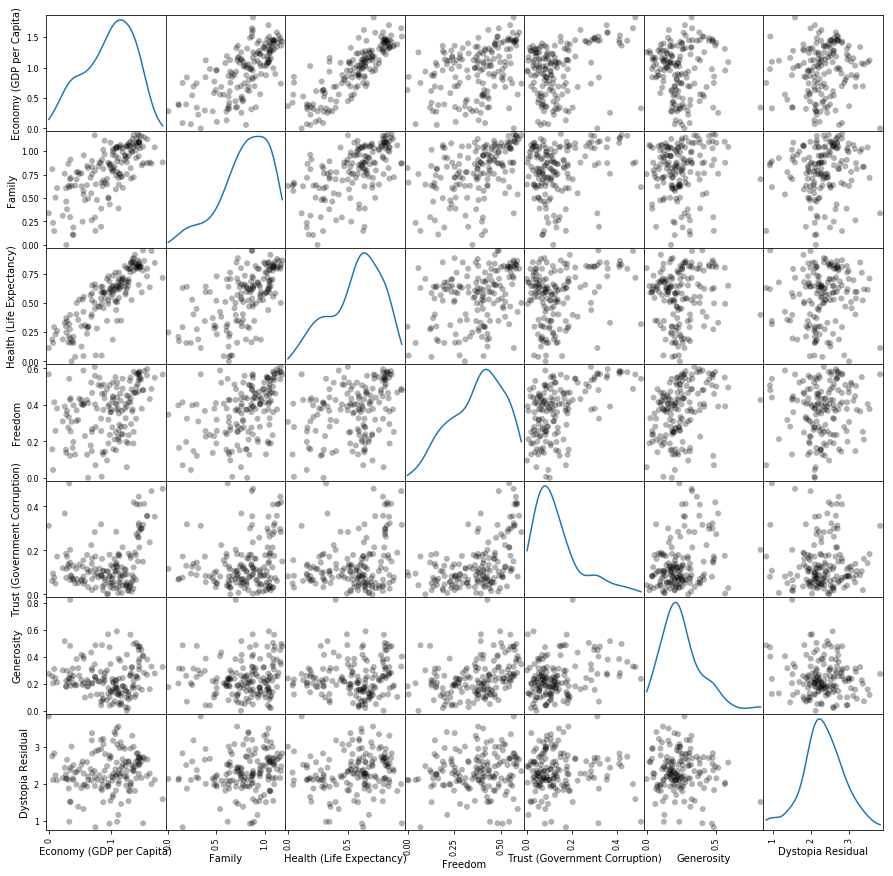

In [167]:
## Scatter matrix between the continuous predictors
scatter_matrix(cs_df[[
               "Economy (GDP per Capita)","Family",
               "Health (Life Expectancy)","Freedom",
                "Trust (Government Corruption)", "Generosity",
               "Dystopia Residual"]], diagonal='kde', alpha=0.3,figsize=(15,15),marker = 'O',color = 'black')

In [168]:
#Due to 0 in attributes, log is not applicable add small constant to attribute need to take log
adj = pd.DataFrame(0.01, index=np.arange(len(cluster_df)), columns=['Adj'])
adjc_df = pd.DataFrame(columns = ['Country','Economy (GDP per Capita)','Family','Health','Freedom',
                                  'Trust','Generosity','Dystopia Residual'])
adjc_df['Country'] = cluster_df['Country']
adjc_df['Economy'] = cluster_df['Economy (GDP per Capita)']
adjc_df['Family'] = cluster_df['Family'] + adj['Adj']
adjc_df['Health'] = cluster_df['Health (Life Expectancy)'] + adj['Adj']
adjc_df['Freedom'] = cluster_df['Freedom'] + adj['Adj']
adjc_df['Trust'] = cluster_df['Trust (Government Corruption)'] + adj['Adj']
adjc_df['Generosity'] = cluster_df['Generosity'] + adj['Adj']
adjc_df['Dystopia Residual'] = cluster_df['Dystopia Residual']

adjc_df.min()

Country                     Afghanistan
Economy (GDP per Capita)           None
Family                             0.01
Health                             0.01
Freedom                            0.01
Trust                              0.01
Generosity                         0.01
Dystopia Residual               0.81789
Economy                               0
dtype: object

In [169]:
from sklearn import preprocessing
import math

logdf = pd.DataFrame(columns = ['Country'])
logdf['Economy'] = adjc_df['Economy']
logdf['Country'] = adjc_df['Country']
logdf['Family_log'] = adjc_df['Family'].apply(math.log)
#math.log:  Return the natural logarithm of the number.
logdf['Freedom_log'] = adjc_df['Freedom'].apply(math.log)
logdf['Health_log'] = adjc_df['Health'].apply(math.log)
logdf['Trust_log'] = adjc_df['Trust'].apply(math.log)
logdf['Generosity_log'] = adjc_df['Generosity'].apply(math.log)
logdf['Dystopia Residual'] = adjc_df['Dystopia Residual']

# Normality check again after log

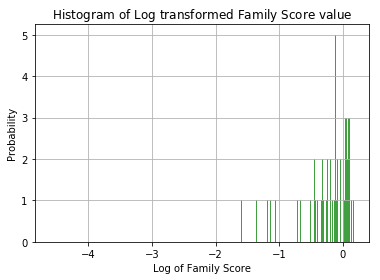

In [170]:
#normality check again
x = logdf['Family_log']
n, bins, patches = plt.hist(x, 1000, facecolor='green', alpha=0.75)

plt.xlabel('Log of Family Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Family\ Score\ value}\ $')
plt.grid(True)
#plt.show()

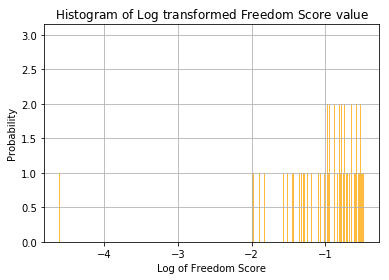

In [171]:
#normality check again
x = logdf['Freedom_log']
n, bins, patches = plt.hist(x, 1000, facecolor='orange', alpha=0.75)

plt.xlabel('Log of Freedom Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Freedom\ Score\ value}\ $')
plt.grid(True)
#plt.show()

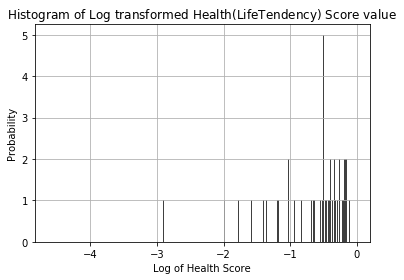

In [172]:
#normality check again
x = logdf['Health_log']
n, bins, patches = plt.hist(x, 1000, facecolor='black', alpha=0.75)

plt.xlabel('Log of Health Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Health(Life Tendency)\ Score\ value}\ $')
plt.grid(True)
#plt.show()

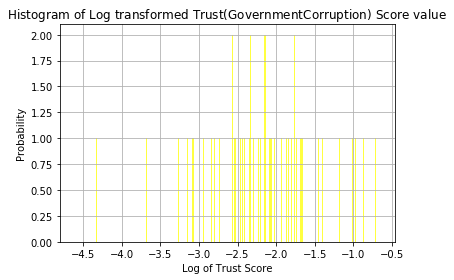

In [173]:
#normality check again
x = logdf['Trust_log']
n, bins, patches = plt.hist(x, 1000, facecolor='yellow', alpha=0.75)

plt.xlabel('Log of Trust Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Trust(Government Corruption)\ Score\ value}\ $')
plt.grid(True)
#plt.show()

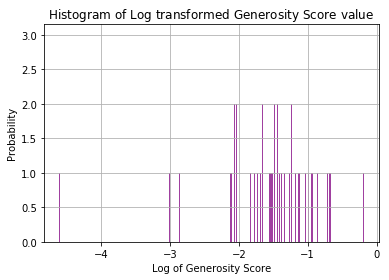

In [174]:
#normality check again
x = logdf['Generosity_log']
n, bins, patches = plt.hist(x, 1000, facecolor='purple', alpha=0.75)

plt.xlabel('Log of Generosity Score')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\  Generosity\ Score\ value}\ $')
plt.grid(True)
#plt.show()

# Finalize attributes for clustering

In [175]:
fcluster_df = cluster_df.copy()
fcluster_df['Trust (Government Corruption)'] = logdf['Trust_log']
fcluster_df['Generosity'] = logdf['Generosity_log']
fcluster_df

Country  Economy (GDP per Capita)  \
0               Afghanistan                   0.38227   
1                   Albania                   0.95530   
2                   Algeria                   1.05266   
3                    Angola                   0.84731   
4                 Argentina                   1.15137   
5                   Armenia                   0.86086   
6                 Australia                   1.44443   
7                   Austria                   1.45038   
8                Azerbaijan                   1.12373   
9                   Bahrain                   1.44024   
10               Bangladesh                   0.54177   
11                  Belarus                   1.13062   
12                  Belgium                   1.42539   
13                   Belize                   0.87616   
14                    Benin                   0.39499   
15                   Bhutan                   0.85270   
16                  Bolivia                   0.79422   
17   Bosnia and Herzegovina                   0.93383   
18                 Botswana                   1.09426   
19                   Brazil                   1.08754   
20                 Bulgaria                   1.11306   
21             Burkina Faso                   0.31995   
22                  Burundi                   0.06831   
23                 Cambodia                   0.55604   
24                 Cameroon                   0.52497   
25                   Canada                   1.44015   
26                     Chad                   0.42214   
27                    Chile                   1.21670   
28                    China                   1.02780   
29                 Colombia                   1.03032   
..                      ...                       ...   
127             South Korea                   1.35948   
128             South Sudan                   0.39394   
129                   Spain                   1.34253   
130               Sri Lanka                   0.97318   
131                   Sudan                   0.63069   
132                Suriname                   1.09686   
133                  Sweden                   1.45181   
134             Switzerland                   1.52733   
135                   Syria                   0.74719   
136                  Taiwan                   1.39729   
137              Tajikistan                   0.48835   
138                Tanzania                   0.47155   
139                Thailand                   1.08930   
140                    Togo                   0.28123   
141     Trinidad and Tobago                   1.32572   
142                 Tunisia                   0.97724   
143                  Turkey                   1.16492   
144            Turkmenistan                   1.08017   
145                  Uganda                   0.34719   
146                 Ukraine                   0.87287   
147    United Arab Emirates                   1.57352   
148          United Kingdom                   1.40283   
149           United States                   1.50796   
150                 Uruguay                   1.18157   
151              Uzbekistan                   0.73591   
152               Venezuela                   1.13367   
153                 Vietnam                   0.74037   
154                   Yemen                   0.57939   
155                  Zambia                   0.61202   
156                Zimbabwe                   0.35041   

                              Region   Family  Health (Life Expectancy)  \
0                      Southern Asia  0.11037                   0.17344   
1         Central and Eastern Europe  0.50163                   0.73007   
2    Middle East and Northern Africa  0.83309                   0.61804   
3                 Sub-Saharan Africa  0.66366                   0.04991   
4        Latin America and Caribbean  1.06612                   0.69711   
5         Central and Eastern Europ

In [176]:
feature_vector = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']
X_subset = fcluster_df[feature_vector].as_matrix()
#.as_matrix: Convert the frame to its Numpy-array representation.
scaler = preprocessing.StandardScaler().fit(X_subset)
#.StandardScaler():   Standardize features by removing the mean and scaling to unit variance 
X_scaled = scaler.transform(X_subset)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



# KMean Clustering

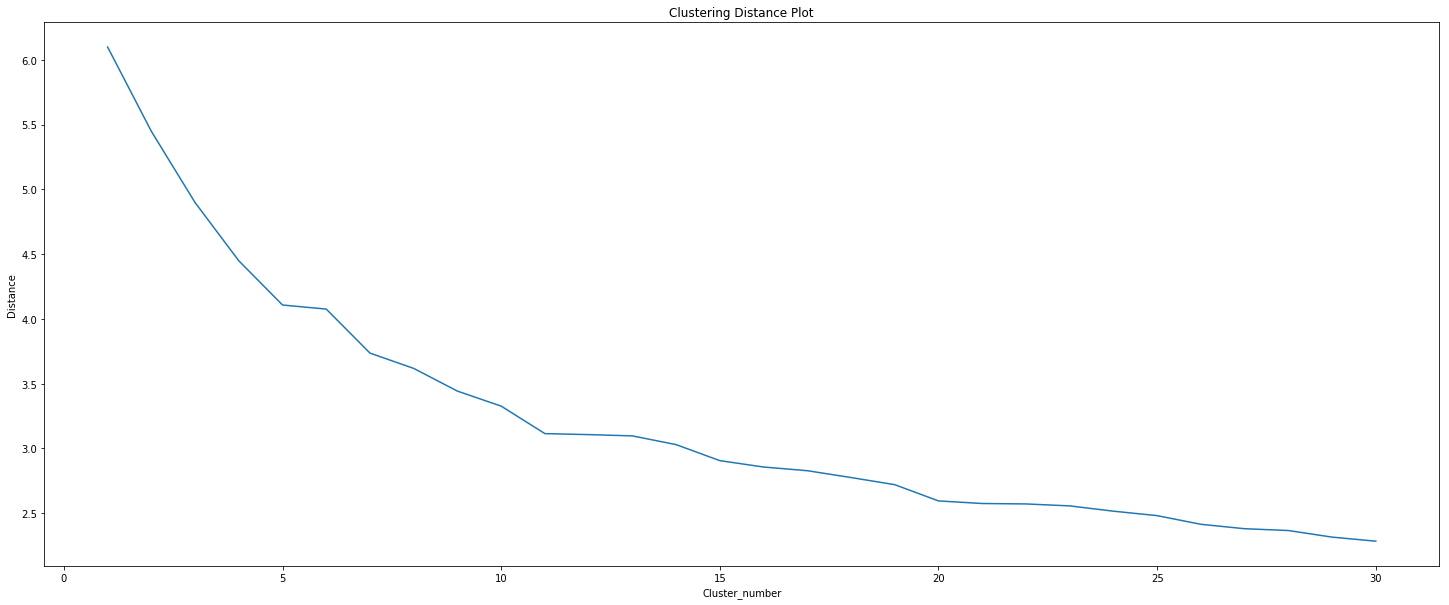

In [177]:
X = X_scaled
Z = sch.linkage(X, 'average')
last = Z[-30:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(25, 10))
plt.title('Clustering Distance Plot')
plt.xlabel('Cluster_number')
plt.ylabel('Distance')
plt.plot(idxs, last_rev)

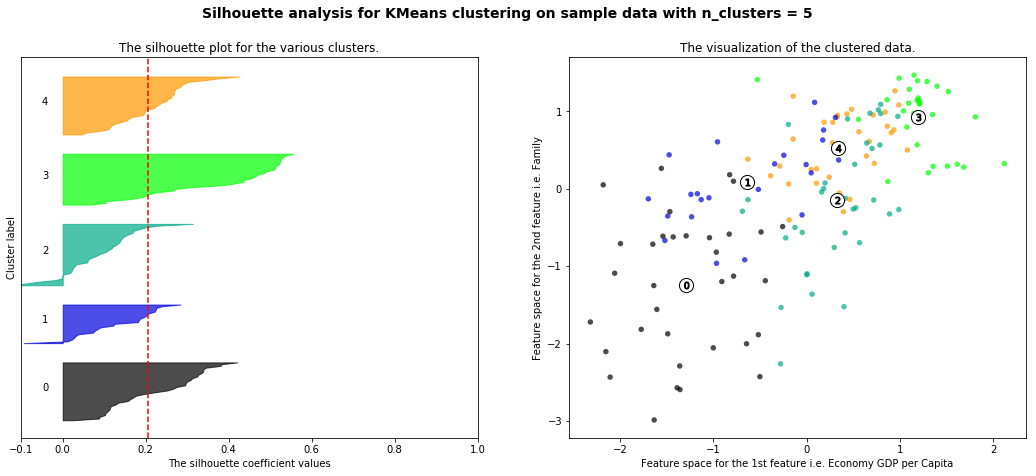

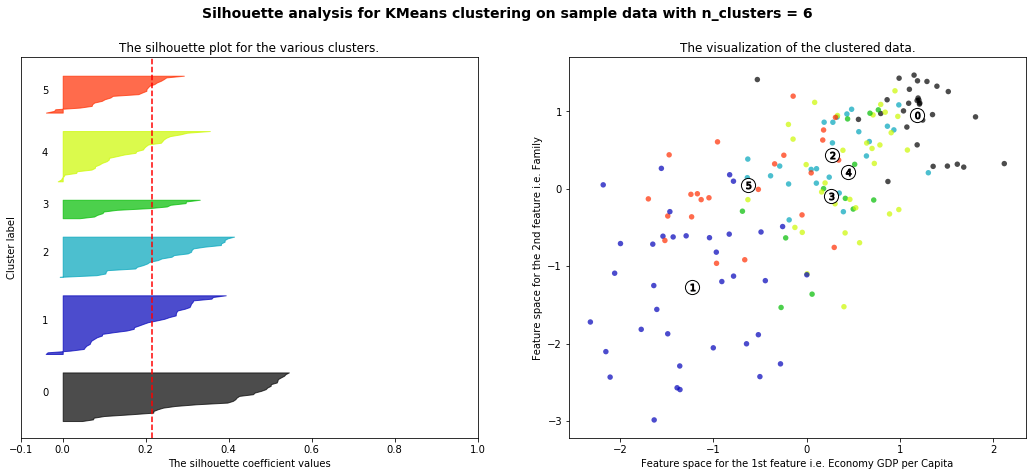

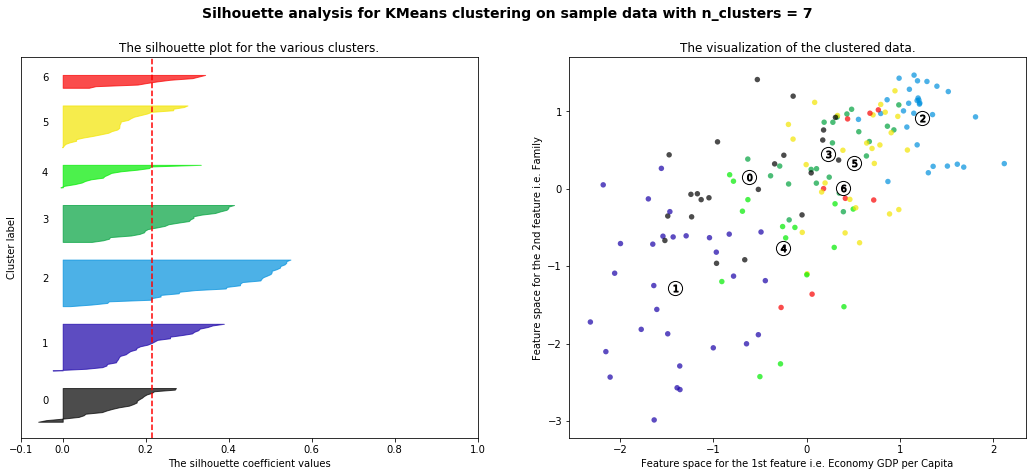

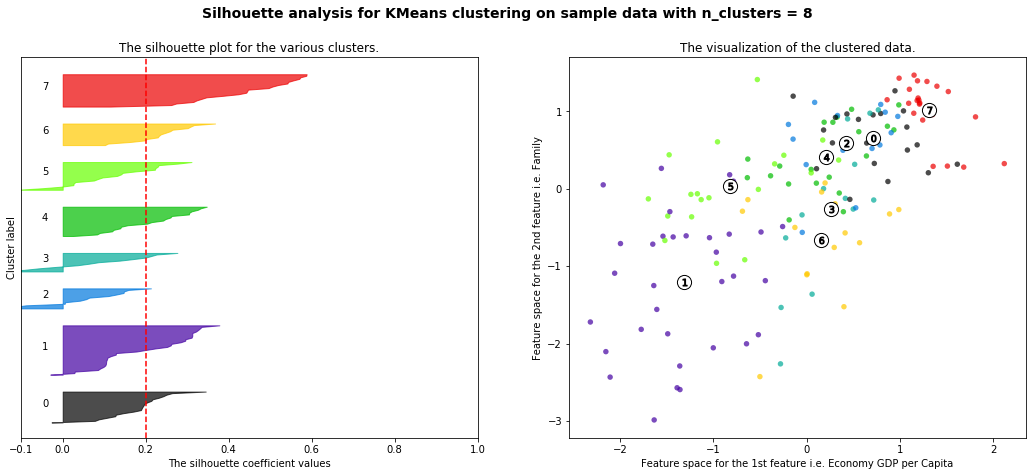

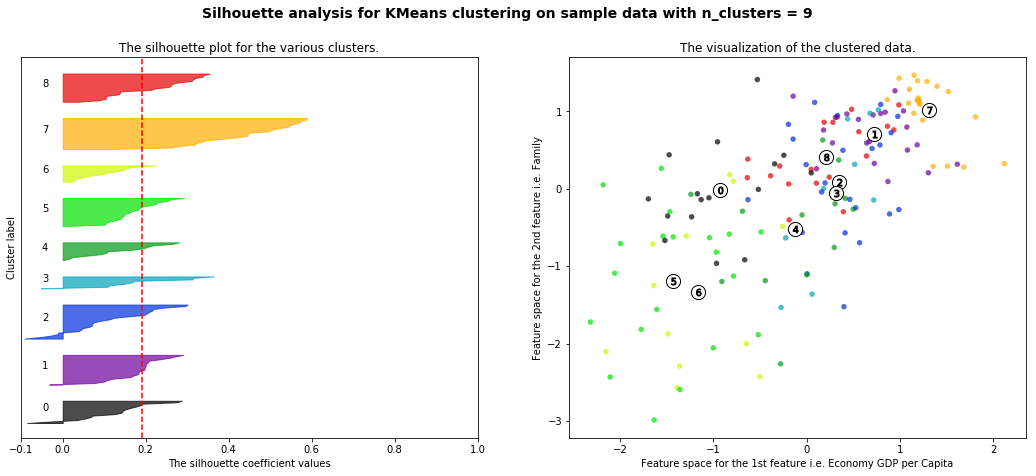

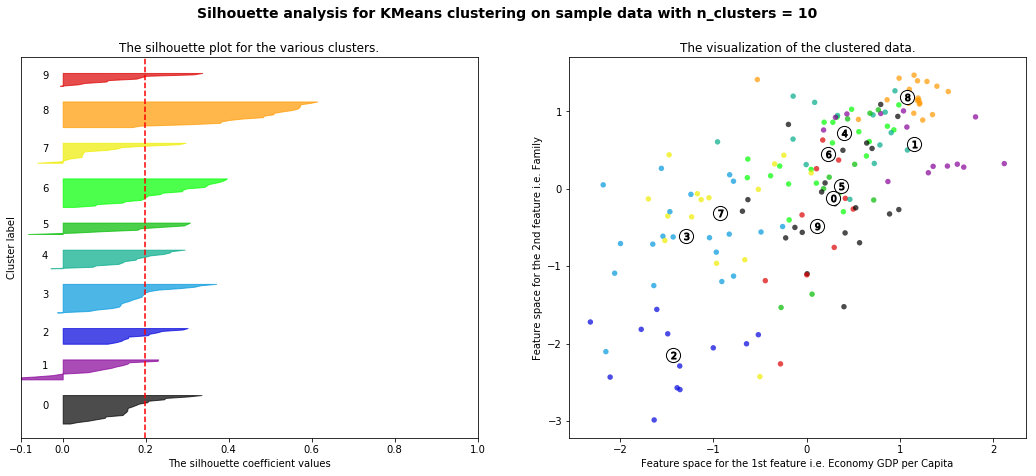

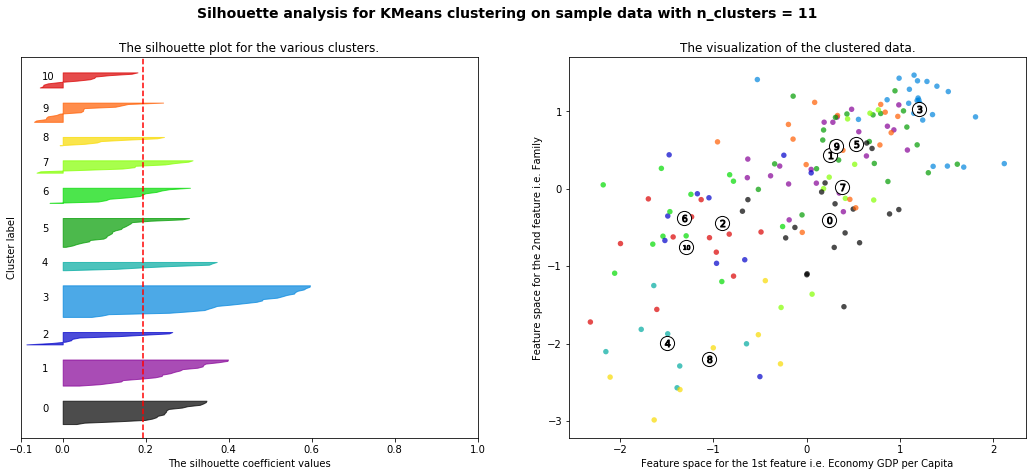

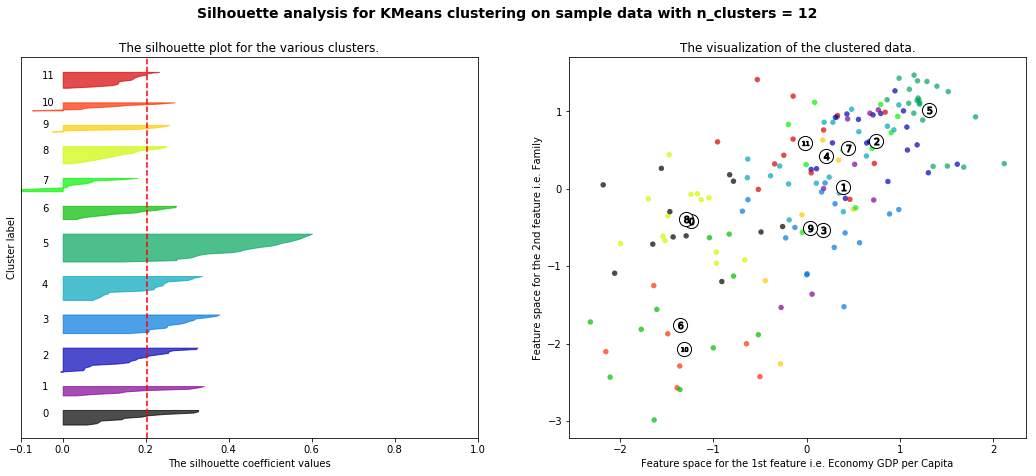

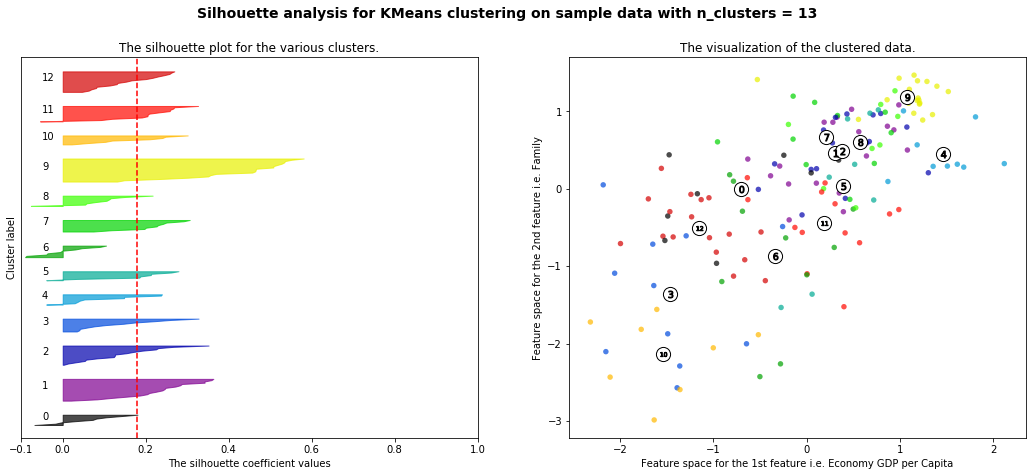

In [235]:
cluster_centers = dict()

for n_clusters in range(5,14,1):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    # needs setting
    #KMeans: perform K-Means clustering
    #n_clusters: The number of clusters to form as well as the number of centroids to generate.
    #random_state: the seed used by the random number generator.
    cluster_labels = clusterer.fit_predict(X)
    #.fit_predict(): Compute cluster centers and predict cluster index for each sample.

    silhouette_avg = silhouette_score(X, cluster_labels)
    # Part 2 p24
    #Compute the mean Silhouette Coefficient of all samples.
    #The Silhouette Coefficient is calculated using the mean intra-cluster distance (a)
    #and the mean nearest-cluster distance (b)
    #for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). 
    
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #silhouette_samples(): Compute the Silhouette Coefficient for each sample.
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        #.spectral(): Set the colormap to “spectral”.
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        #.fill_betweenx(): Fill the area between two vertical curves.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        #.text(): Add text to the axes.
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") #vertical dotted line = avg silhouette
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    # needs setting 
    feature1 = 0 # the location  #change in assign
    feature2 = 1 # the location  #change in assign
    ax2.scatter(X[:, feature1], X[:, feature2], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    #cluster_centers_: Coordinates of cluster centers
    # needs setting 
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers): #add label circle in cluster
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. Economy GDP per Capita")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. Family")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

In [245]:
for i in range(5,14,1):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    #.inverse_transform(): Scale back the data to the original representation
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 5 number of clusters
   Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                  1.523852  1.589491                  1.268501  1.303683   
1                  1.997928  2.261907                  1.537788  1.559880   
2                  2.962857  2.125052                  1.927555  1.277316   
3                  4.244524  2.824972                  2.212796  1.697351   
4                  2.973220  2.546317                  1.916051  1.523753   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                       0.109165    0.234283          10.288324  
1                       0.113424    0.307381           5.945584  
2                       0.063283    0.119032           8.942339  
3                       0.294563    0.314887          10.595175  
4                       0.090344    0.206043          16.452252  
Silhouette score for cluster 5 is 0.20667668829897773

for 6 number of clusters
   Economy (GDP per Capita)    Famil

In [246]:
labels = cluster_centers[5]['labels']
fcluster_df['num_cluster5_labels'] = labels
labels = cluster_centers[6]['labels']
fcluster_df['num_cluster6_labels'] = labels
labels = cluster_centers[7]['labels']
fcluster_df['num_cluster7_labels'] = labels

In [247]:
fcluster_df.head()

Country  Economy (GDP per Capita)                           Region  \
0  Afghanistan                   0.38227                    Southern Asia   
1      Albania                   0.95530       Central and Eastern Europe   
2      Algeria                   1.05266  Middle East and Northern Africa   
3       Angola                   0.84731               Sub-Saharan Africa   
4    Argentina                   1.15137      Latin America and Caribbean   

    Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0  0.11037                   0.17344  0.16430                      -2.511826   
1  0.50163                   0.73007  0.31866                      -2.764462   
2  0.83309                   0.61804  0.21006                      -1.762764   
3  0.66366                   0.04991  0.00589                      -2.360850   
4  1.06612                   0.69711  0.42284                      -2.489397   

   Generosity  Dystopia Residual  num_cluster5_labels  num_cluster6_labels  \
0   -1.131094            2.14558                    0                    1   
1   -1.723727            1.92816                    2                    4   
2   -2.520244            3.40904                    4                    2   
3   -2.034774            2.09459                    0                    1   
4   -2.121181            3.12985                    4                    2   

   num_cluster7_labels  H_labels  H2_labels  DB_labels  
0                    1         2          0          0  
1                    5         0          0          0  
2                    3         0          0          0  
3                    4         2          0          0  
4                    3         0          0          0

In [262]:
def boxplot6(xyzxyz):
    x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6']
    cutoff_quantile = 100
    field_to_plot = xyzxyz
    y0 = fcluster_df[fcluster_df['num_cluster6_labels']==0][field_to_plot].values
    y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
    y1 = fcluster_df[fcluster_df['num_cluster6_labels']==1][field_to_plot].values
    y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
    y2 = fcluster_df[fcluster_df['num_cluster6_labels']==2][field_to_plot].values
    y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
    y3 = fcluster_df[fcluster_df['num_cluster6_labels']==3][field_to_plot].values
    y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
    y4 = fcluster_df[fcluster_df['num_cluster6_labels']==4][field_to_plot].values
    y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
    y5 = fcluster_df[fcluster_df['num_cluster6_labels']==5][field_to_plot].values
    y5 = y5[y5<np.percentile(y5, cutoff_quantile)]

    y_data = [y0,y1,y2,y3,y4,y5]

    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
    traces = []

    for xd, yd, cls in zip(x_data, y_data, colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
                boxpoints=False,
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=cls,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1),
            ))

    layout = go.Layout(
        title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=50,
            gridcolor='black',
            gridwidth=0.1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,
        ),
        plot_bgcolor='white',
        showlegend=False
    )
    
    fig = go.Figure(data=traces, layout=layout)
    return py.offline.iplot(fig)

In [263]:
boxplot6('Economy (GDP per Capita)')
boxplot6('Family')
boxplot6('Health (Life Expectancy)')
boxplot6('Freedom')
boxplot6('Trust (Government Corruption)')
boxplot6('Generosity')
boxplot6('Dystopia Residual')

In [264]:
def boxplot7(xyzxyz):
    x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7']
    cutoff_quantile = 100
    field_to_plot = xyzxyz
    y0 = fcluster_df[fcluster_df['num_cluster7_labels']==0][field_to_plot].values
    y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
    y1 = fcluster_df[fcluster_df['num_cluster7_labels']==1][field_to_plot].values
    y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
    y2 = fcluster_df[fcluster_df['num_cluster7_labels']==2][field_to_plot].values
    y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
    y3 = fcluster_df[fcluster_df['num_cluster7_labels']==3][field_to_plot].values
    y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
    y4 = fcluster_df[fcluster_df['num_cluster7_labels']==4][field_to_plot].values
    y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
    y5 = fcluster_df[fcluster_df['num_cluster7_labels']==5][field_to_plot].values
    y5 = y5[y5<np.percentile(y5, cutoff_quantile)]
    y6 = fcluster_df[fcluster_df['num_cluster7_labels']==6][field_to_plot].values
    y6 = y6[y6<np.percentile(y6, cutoff_quantile)]

    y_data = [y0,y1,y2,y3,y4,y5,y6]

    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(237, 96, 33, 0.5)']
    traces = []

    for xd, yd, cls in zip(x_data, y_data, colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
                boxpoints=False,
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=cls,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1),
            ))

    layout = go.Layout(
        title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=50,
            gridcolor='black',
            gridwidth=0.1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,
        ),
        plot_bgcolor='white',
        showlegend=False
    )
    
    fig = go.Figure(data=traces, layout=layout)
    py.offline.iplot(fig)

In [265]:
boxplot7('Economy (GDP per Capita)')
boxplot7('Family')
boxplot7('Health (Life Expectancy)')
boxplot7('Freedom')
boxplot7('Trust (Government Corruption)')
boxplot7('Generosity')
boxplot7('Dystopia Residual')

In [186]:
analytics_df['num_cluster7_labels'] = fcluster_df['num_cluster7_labels']
analyticskm_df = analytics_df.loc[analytics_df['num_cluster7_labels'] == 6]
analyticskm_df

Country  Economy (GDP per Capita)                           Region  \
8    Azerbaijan                   1.12373       Central and Eastern Europe   
28        China                   1.02780                     Eastern Asia   
50       Greece                   1.24886                   Western Europe   
79    Lithuania                   1.26920       Central and Eastern Europe   
93      Morocco                   0.84058  Middle East and Northern Africa   
115      Russia                   1.23228       Central and Eastern Europe   
142     Tunisia                   0.97724  Middle East and Northern Africa   
143      Turkey                   1.16492  Middle East and Northern Africa   
152   Venezuela                   1.13367      Latin America and Caribbean   

      Family  Health (Life Expectancy)  Freedom  \
8    0.76042                   0.54504  0.35327   
28   0.79381                   0.73561  0.44012   
50   0.75473                   0.80029  0.05822   
79   1.06411                   0.64674  0.18929   
93   0.38595                   0.59471  0.25646   
115  1.05261                   0.58991  0.32682   
142  0.43165                   0.59577  0.23553   
143  0.87717                   0.64718  0.23889   
152  1.03302                   0.61904  0.19847   

     Trust (Government Corruption)  Generosity  Dystopia Residual  \
8                          0.17914     0.05640            2.27350   
28                         0.02745     0.04959            2.17087   
50                         0.04127     0.00000            2.12944   
79                         0.01820     0.02025            2.60525   
93                         0.08404     0.04053            2.94891   
115                        0.03586     0.02736            2.59115   
142                        0.08170     0.03936            2.68413   
143                        0.12348     0.04707            2.29074   
152                        0.08304     0.04250            2.97468   

     Happiness Score  num_cluster7_labels  
8              5.291                    6  
28             5.245                    6  
50             5.033                    6  
79             5.813                    6  
93             5.151                    6  
115            5.856                    6  
142            5.045                    6  
143            5.389                    6  
152            6.084                    6

In [187]:
analyticskm_df['Happiness Score'].mean()

5.434111111111112

In [188]:
analytics_df['Happiness Score'].mean()

5.382184713375797

In [189]:
(analyticskm_df['Happiness Score'].mean()-analytics_df['Happiness Score'].mean())/analytics_df['Happiness Score'].std()

0.04548270318509911

# Hierarchical clustering

In [190]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

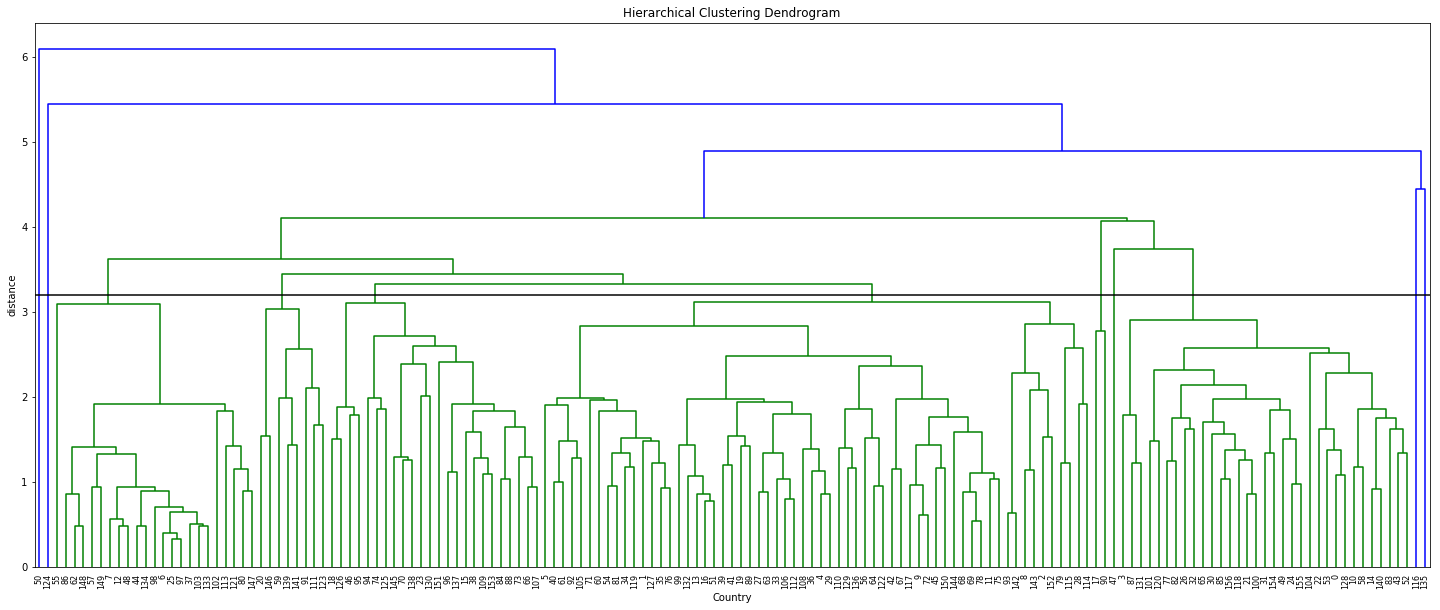

In [191]:
# calculate full dendrogram
# generate the linkage matrix

# set cut-off
max_d = 3.2                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('distance')
sch.dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=200,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [192]:
# create clusters
hc = AgglomerativeClustering(n_clusters=11, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc = hc.fit_predict(X)

In [193]:
def boxplotHC(xyzxyz):
    ## find the labels of each cluster    
    x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8','Cluster 9','Cluster 10','Cluster 11']
    cutoff_quantile = 100
    field_to_plot = xyzxyz
    y0 = fcluster_df[fcluster_df['H_labels']==0][field_to_plot].values
    y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
    y1 = fcluster_df[fcluster_df['H_labels']==1][field_to_plot].values
    y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
    y2 = fcluster_df[fcluster_df['H_labels']==2][field_to_plot].values
    y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
    y3 = fcluster_df[fcluster_df['H_labels']==3][field_to_plot].values
    y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
    y4 = fcluster_df[fcluster_df['H_labels']==4][field_to_plot].values
    y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
    y5 = fcluster_df[fcluster_df['H_labels']==5][field_to_plot].values
    y5 = y5[y5<np.percentile(y5, cutoff_quantile)]
    y6 = fcluster_df[fcluster_df['H_labels']==6][field_to_plot].values
    y6 = y6[y6<np.percentile(y6, cutoff_quantile)]
    y7 = fcluster_df[fcluster_df['H_labels']==7][field_to_plot].values
    y7 = y7[y7<np.percentile(y7, cutoff_quantile)]
    y8 = fcluster_df[fcluster_df['H_labels']==8][field_to_plot].values
    y8 = y8[y8<np.percentile(y8, cutoff_quantile)]
    y9 = fcluster_df[fcluster_df['H_labels']==9][field_to_plot].values
    y9 = y9[y9<np.percentile(y9, cutoff_quantile)]
    y10 = fcluster_df[fcluster_df['H_labels']==10][field_to_plot].values
    y10 = y10[y10<np.percentile(y10, cutoff_quantile)]

    y_data = [y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10]

    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 
              'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
              'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
              'rgba(237, 96, 33, 0.5)','rgba(96, 33, 133, 0.5)',
              'rgba(27, 196, 233, 0.5)','rgba(25, 244, 114, 0.5)',
              'rgba(55, 44, 214, 0.5)']
    traces = []

    for xd, yd, cls in zip(x_data, y_data, colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
                boxpoints=False,
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=cls,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1),
            ))

    layout = go.Layout(
        title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=50,
            gridcolor='black',
            gridwidth=0.1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,
        ),
        plot_bgcolor='white',
        showlegend=False
    )
    
    fig = go.Figure(data=traces, layout=layout)
    py.offline.iplot(fig)

In [194]:
fcluster_df['H_labels'] = y_hc

boxplotHC('Economy (GDP per Capita)')
boxplotHC('Family')
boxplotHC('Health (Life Expectancy)')
boxplotHC('Freedom')
boxplotHC('Trust (Government Corruption)')
boxplotHC('Generosity')
boxplotHC('Dystopia Residual')

In [195]:
analytics_df['H_labels'] = fcluster_df['H_labels']
analyticshc1_df = analytics_df.loc[analytics_df['H_labels'] == 10]
analyticshc1_df

Country  Economy (GDP per Capita)  \
20              Bulgaria                   1.11306   
59             Indonesia                   0.95104   
91              Mongolia                   0.98853   
111             Portugal                   1.27607   
123             Slovenia                   1.29947   
139             Thailand                   1.08930   
141  Trinidad and Tobago                   1.32572   
146              Ukraine                   0.87287   

                          Region   Family  Health (Life Expectancy)  Freedom  \
20    Central and Eastern Europe  0.92542                   0.67806  0.21219   
59             Southeastern Asia  0.87625                   0.49374  0.39237   
91                  Eastern Asia  1.08983                   0.55469  0.35972   
111               Western Europe  0.94367                   0.79363  0.44727   
123   Central and Eastern Europe  1.05613                   0.79151  0.53164   
139            Southeastern Asia  1.04477                   0.64915  0.49553   
141  Latin America and Caribbean  0.98569                   0.52608  0.48453   
146   Central and Eastern Europe  1.01413                   0.58628  0.12859   

     Trust (Government Corruption)  Generosity  Dystopia Residual  \
20                         0.00615     0.12793            1.15377   
59                         0.00322     0.56521            2.03171   
91                         0.03285     0.34539            1.53586   
111                        0.01521     0.11691            1.53015   
123                        0.03635     0.25738            1.79522   
139                        0.02833     0.58696            2.57960   
141                        0.01241     0.31935            2.51394   
146                        0.01829     0.20363            1.50066   

     Happiness Score  num_cluster7_labels  H_labels  
20             4.217                    5        10  
59             5.314                    5        10  
91             4.907                    5        10  
111            5.123                    5        10  
123            5.768                    5        10  
139            6.474                    5        10  
141            6.168                    5        10  
146            4.324                    5        10

In [196]:
analyticshc1_df['Happiness Score'].mean()

5.286875

In [197]:
(analyticshc1_df['Happiness Score'].mean()-analytics_df['Happiness Score'].mean())/analytics_df['Happiness Score'].std()

-0.08348245965808784

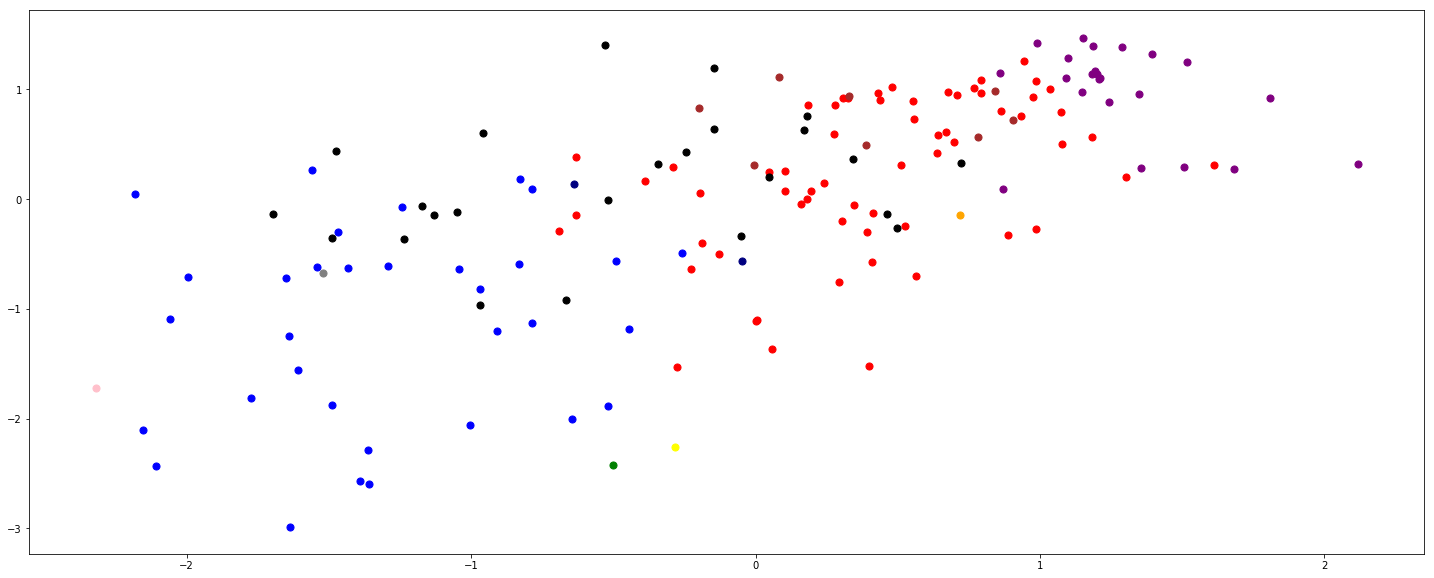

In [198]:
plt.figure(figsize=(25, 10))
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=50, c='red',marker = 'o')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=50, c='black',marker = 'o')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=50, c='blue',marker = 'o')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=50, c='green',marker = 'o')
plt.scatter(X[y_hc ==4,0], X[y_hc == 4,1], s=50, c='purple',marker = 'o')
plt.scatter(X[y_hc ==5,0], X[y_hc == 5,1], s=50, c='pink',marker = 'o')
plt.scatter(X[y_hc ==6,0], X[y_hc == 6,1], s=50, c='navy',marker = 'o')
plt.scatter(X[y_hc ==7,0], X[y_hc == 7,1], s=50, c='yellow',marker = 'o')
plt.scatter(X[y_hc ==8,0], X[y_hc == 8,1], s=50, c='orange',marker = 'o')
plt.scatter(X[y_hc ==9,0], X[y_hc == 9,1], s=50, c='grey',marker = 'o')
plt.scatter(X[y_hc ==10,0], X[y_hc == 10,1], s=50, c='brown',marker = 'o')



In [199]:
# find cluster means and size
hc_table = fcluster_df.groupby('H_labels')
print(hc_table['Economy (GDP per Capita)'].count())

H_labels
0     62
1     24
2     33
3      1
4     23
5      1
6      2
7      1
8      1
9      1
10     8
Name: Economy (GDP per Capita), dtype: int64


In [200]:
hc_table['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
        'Generosity','Dystopia Residual'].mean()

Economy (GDP per Capita)    Family  Health (Life Expectancy)  \
H_labels                                                                 
0                         1.124250  0.853097                  0.661702   
1                         0.758493  0.832597                  0.458352   
2                         0.424793  0.486225                  0.234739   
3                         0.747190  0.148660                  0.629940   
4                         1.483893  1.053042                  0.824611   
5                         0.000000  0.336130                  0.114660   
6                         0.812800  0.737495                  0.615375   
7                         0.837920  0.192490                  0.640350   
8                         1.248860  0.754730                  0.800290   
9                         0.328460  0.615860                  0.318650   
10                        1.114507  0.991986                  0.634143   

           Freedom  Trust (Government Corruption)  Generosity  \
H_labels                                                        
0         0.342037                      -2.330655   -1.891290   
1         0.453567                      -2.192706   -1.224012   
2         0.263340                      -2.258663   -1.484115   
3         0.069120                      -1.701937   -0.705280   
4         0.543567                      -1.164157   -0.976855   
5         0.567780                      -1.133825   -1.264962   
6         0.173565                      -4.072298   -1.367780   
7         0.324610                      -1.112306   -2.552843   
8         0.058220                      -2.970649   -4.605170   
9         0.543200                      -0.663181   -1.404377   
10        0.381480                      -3.622372   -1.265247   

          Dystopia Residual  
H_labels                     
0                  2.563812  
1                  1.881048  
2                  2.320525  
3                  0.817890  
4                  2.362793  
5                  3.837720  
6                  2.932065  
7                  1.870310  
8                  2.129440  
9                  0.968190  
10                 1.830114

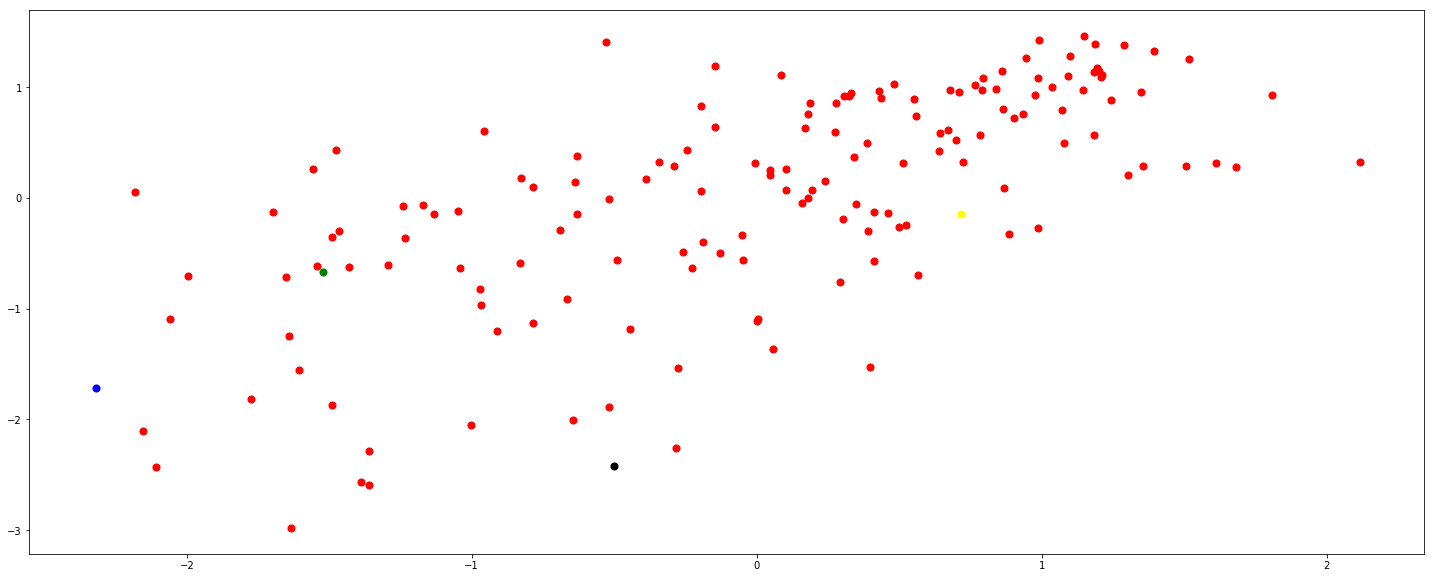

In [201]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')
# save clusters for chart
y_hc2 = hc2.fit_predict(X)
plt.figure(figsize=(25, 10))
plt.scatter(X[y_hc2 ==0,0], X[y_hc2 == 0,1], s=50, c='red')
plt.scatter(X[y_hc2==1,0], X[y_hc2 == 1,1], s=50, c='black')
plt.scatter(X[y_hc2 ==2,0], X[y_hc2 == 2,1], s=50, c='blue')
plt.scatter(X[y_hc2==3,0], X[y_hc2 == 3,1], s=50, c='yellow')
plt.scatter(X[y_hc2 ==4,0], X[y_hc2 == 4,1], s=50, c='green')

In [202]:
def boxplotHC2(xyzxyz):
    ## find the labels of each cluster    
    x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
    cutoff_quantile = 100
    field_to_plot = xyzxyz
    y0 = fcluster_df[fcluster_df['H2_labels']==0][field_to_plot].values
    y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
    y1 = fcluster_df[fcluster_df['H2_labels']==1][field_to_plot].values
    y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
    y2 = fcluster_df[fcluster_df['H2_labels']==2][field_to_plot].values
    y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
    y3 = fcluster_df[fcluster_df['H2_labels']==3][field_to_plot].values
    y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
    y4 = fcluster_df[fcluster_df['H2_labels']==4][field_to_plot].values
    y4 = y4[y4<np.percentile(y4, cutoff_quantile)]

    y_data = [y0,y1,y2,y3,y4]

    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(237, 96, 33, 0.5)']
    traces = []

    for xd, yd, cls in zip(x_data, y_data, colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
                boxpoints=False,
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=cls,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1),
            ))

    layout = go.Layout(
        title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=50,
            gridcolor='black',
            gridwidth=0.1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,
        ),
        plot_bgcolor='white',
        showlegend=False
    )
    
    fig = go.Figure(data=traces, layout=layout)
    py.offline.iplot(fig)

In [203]:
fcluster_df['H2_labels'] = y_hc2

boxplotHC2('Economy (GDP per Capita)')
boxplotHC2('Family')
boxplotHC2('Health (Life Expectancy)')
boxplotHC2('Freedom')
boxplotHC2('Trust (Government Corruption)')
boxplotHC2('Generosity')
boxplotHC2('Dystopia Residual')

In [204]:
# find cluster means and size
hc_table = fcluster_df.groupby('H2_labels')
hc_table['Family'].count()

H2_labels
0    153
1      1
2      1
3      1
4      1
Name: Family, dtype: int64

In [205]:
hc_table['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
        'Generosity','Dystopia Residual'].mean()

Economy (GDP per Capita)    Family  Health (Life Expectancy)  \
H2_labels                                                                 
0                          0.963625  0.802243                  0.560017   
1                          0.747190  0.148660                  0.629940   
2                          0.000000  0.336130                  0.114660   
3                          1.248860  0.754730                  0.800290   
4                          0.328460  0.615860                  0.318650   

            Freedom  Trust (Government Corruption)  Generosity  \
H2_labels                                                        
0          0.372599                      -2.200477   -1.526079   
1          0.069120                      -1.701937   -0.705280   
2          0.567780                      -1.133825   -1.264962   
3          0.058220                      -2.970649   -4.605170   
4          0.543200                      -0.663181   -1.404377   

           Dystopia Residual  
H2_labels                     
0                   2.335937  
1                   0.817890  
2                   3.837720  
3                   2.129440  
4                   0.968190

# DBSCAN

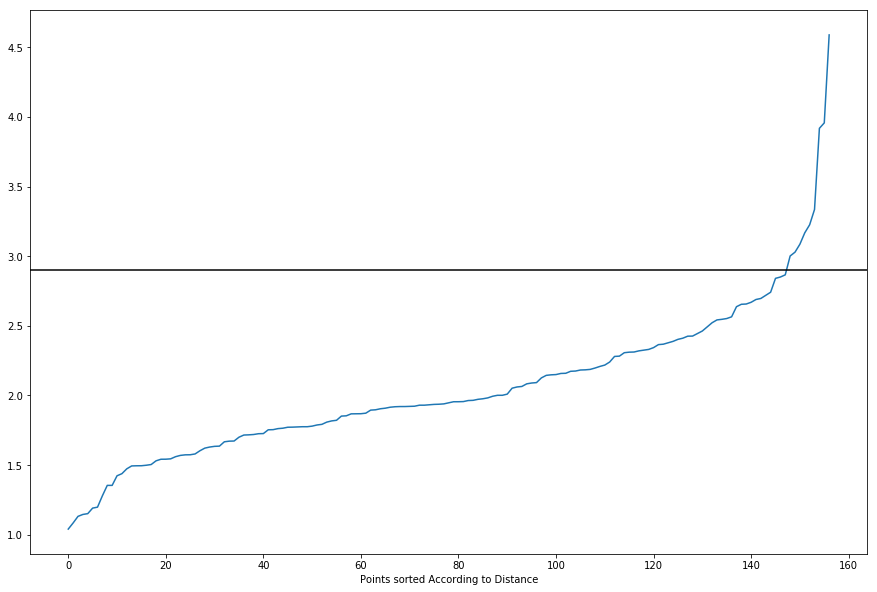

In [208]:
### estimate eps
ns = 14
nbrs = NearestNeighbors(n_neighbors=ns).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,ns-1], reverse=False)
plt.figure(figsize=(15, 10))
plt.plot(indices[:,0], distanceDec)
plt.xlabel('Points sorted According to Distance')
plt.axhline(y=2.9, c='k')

In [209]:
## .DBSCAN() fit by DBSCAN method
db = DBSCAN(eps=2.9).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Silhouette Coefficient: 0.319


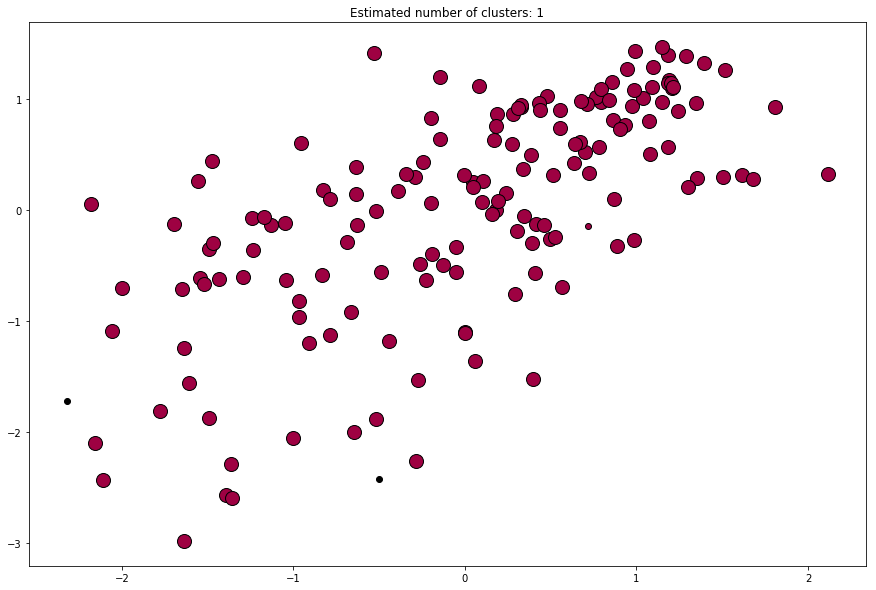

In [210]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(15, 10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [211]:
def boxplotDB(xyzxyz):
    ## find the labels of each cluster    
    x_data = ['Cluster 1']
    cutoff_quantile = 100
    field_to_plot = xyzxyz
    y0 = fcluster_df[fcluster_df['DB_labels']==0][field_to_plot].values
    y0 = y0[y0<np.percentile(y0, cutoff_quantile)]

    y_data = [y0]

    colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)','rgba(237, 96, 33, 0.5)']
    traces = []

    for xd, yd, cls in zip(x_data, y_data, colors):
            traces.append(go.Box(
                y=yd,
                name=xd,
                boxpoints=False,
                jitter=0.5,
                whiskerwidth=0.2,
                fillcolor=cls,
                marker=dict(
                    size=2,
                ),
                line=dict(width=1),
            ))

    layout = go.Layout(
        title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
        yaxis=dict(
            autorange=True,
            showgrid=True,
            zeroline=True,
            dtick=50,
            gridcolor='black',
            gridwidth=0.1,
            zerolinecolor='rgb(255, 255, 255)',
            zerolinewidth=2,
        ),
        margin=dict(
            l=40,
            r=30,
            b=80,
            t=100,
        ),
        plot_bgcolor='white',
        showlegend=False
    )
    
    fig = go.Figure(data=traces, layout=layout)
    py.offline.iplot(fig)

In [212]:
fcluster_df['DB_labels'] = labels
boxplotDB('Economy (GDP per Capita)')
boxplotDB('Family')
boxplotDB('Health (Life Expectancy)')
boxplotDB('Freedom')
boxplotDB('Trust (Government Corruption)')
boxplotDB('Generosity')
boxplotDB('Dystopia Residual')

In [213]:
# find cluster means and size
# -1 means outlier
hc_table = fcluster_df.groupby('DB_labels')
hc_table['Freedom'].count()

DB_labels
-1      2
 0    155
Name: Freedom, dtype: int64

In [214]:
hc_table['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
        'Generosity','Dystopia Residual'].mean()

Economy (GDP per Capita)    Family  Health (Life Expectancy)  \
DB_labels                                                                 
-1                         0.373595  0.242395                   0.37230   
 0                         0.961367  0.800734                   0.56001   

            Freedom  Trust (Government Corruption)  Generosity  \
DB_labels                                                        
-1         0.318450                      -1.417881   -0.985121   
 0         0.371672                      -2.195527   -1.545159   

           Dystopia Residual  
DB_labels                     
-1                  2.327805  
 0                  2.325781

In [215]:
analytics_df['DB_labels'] = fcluster_df['DB_labels']
analyticshc1_df = analytics_df.loc[analytics_df['DB_labels'] == -1]
analyticshc1_df

Country  Economy (GDP per Capita)                           Region  \
124  Somalia                   0.00000               Sub-Saharan Africa   
135    Syria                   0.74719  Middle East and Northern Africa   

      Family  Health (Life Expectancy)  Freedom  \
124  0.33613                   0.11466  0.56778   
135  0.14866                   0.62994  0.06912   

     Trust (Government Corruption)  Generosity  Dystopia Residual  \
124                        0.31180     0.27225            3.83772   
135                        0.17233     0.48397            0.81789   

     Happiness Score  num_cluster7_labels  H_labels  DB_labels  
124            5.440                    1         5         -1  
135            3.069                    4         3         -1

In [216]:
rann = rankeddf[rankeddf['Country'] == 'Somalia']
rann

Country  Happiness Rank  Economy (GDP per Capita)  Family  \
75  Somalia              76                       157     144   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
75                       152       11                             17   

    Generosity  Dystopia Residual  
75          52                  1